In [12]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.preprocessing import minmax_scale

from numpy.random import default_rng
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
plt.style.use('seaborn') # pretty matplotlib plots
sns.set(font_scale=2)

In [13]:
# Load 3 feature version of x arrays
x_train = np.loadtxt('./data_sneaker_vs_sandal/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_sneaker_vs_sandal/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_sneaker_vs_sandal/y_train.csv', delimiter=',', skiprows=1)

In [3]:
thres = 0.01
x_train_ft_trans = np.zeros(12000*784).reshape(12000,784)
x_test_ft_trans = np.zeros(2000*784).reshape(2000,784)

for i in range(12000):
    for j in range(784):
        if (x_train[i][j] >= thres):
            x_train_ft_trans[i][j] = 1
        else:
            x_train_ft_trans[i][j] = 0

for i in range(2000):
    for j in range(784):
        if (x_test[i][j] >= thres):
            x_test_ft_trans[i][j] = 1
        else:
            x_test_ft_trans[i][j] = 0

In [4]:
x_tr, x_va, y_tr, y_va = train_test_split(x_train_ft_trans, y_train, test_size=0.4)

In [5]:
model = LogisticRegression(solver='liblinear')
model.fit(x_tr, y_tr)

prob_tr = model.predict_proba(x_tr)
prob_va = model.predict_proba(x_va)

acc_tr = model.score(x_tr, y_tr)
acc_va = model.score(x_va, y_va)

tr_log_loss = log_loss(y_tr,prob_tr)
va_log_loss = log_loss(y_va,prob_va)

print('train log loss', tr_log_loss)
print('validation log loss', va_log_loss)


print('train acc', acc_tr)
print('validation acc', acc_va)

train log loss 0.04301962257132582
validation log loss 0.09778229203132871
train acc 0.9884722222222222
validation acc 0.9622916666666667


# 试！

In [6]:
thres = 0.001

x_train_ft_trans = np.zeros(12000*784).reshape(12000,784)
x_test_ft_trans = np.zeros(2000*784).reshape(2000,784)


for i in range(12000):
    for j in range(784):
        if (x_train[i][j] >= thres):
            x_train_ft_trans[i][j] = 1
        else:
            x_train_ft_trans[i][j] = 0

for i in range(2000):
    for j in range(784):
        if (x_test[i][j] >= thres):
            x_test_ft_trans[i][j] = 1
        else:
            x_test_ft_trans[i][j] = 0
            

In [7]:
x_train_ft_trans

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
x_train_ft_trans = x_train
x_test_ft_trans = x_test

In [37]:
# create empty lists
model_list = []
acc_list = []
loss_list = []

# generate 30 logarithmically spaced vectors from 0 to 1
thres_grid = np.logspace(-9, 1, 30)/10

# Tune for the best threshold based on log loss of validation set
for thres in thres_grid:
    x_train_ft_trans = x_train
    x_test_ft_trans = x_test
    
    # amplify pixel intensity based on the threshold 
    x_train_ft_trans[x_train_ft_trans >= thres] = 1
    x_train_ft_trans[x_train_ft_trans <  thres] = 0
    
    x_test_ft_trans[x_test_ft_trans >= thres] = 1
    x_test_ft_trans[x_test_ft_trans <  thres] = 0

    # train model
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train_ft_trans, y_train)
    
    # calculate log loss and accuracy rate
    prob_train = model.predict_proba(x_train_ft_trans)
    train_log_loss = log_loss(y_train, prob_train)
    acc_train = model.score(x_train_ft_trans, y_train)
        
    # append model, accuracy, and log loss to the list 
    model_list.append(model)
    acc_list.append(acc_train)
    loss_list.append(train_log_loss)

In [37]:
# create empty lists
model_list = []
acc_list = []
loss_list = []

# generate 30 logarithmically spaced vectors from 0 to 1
thres_grid = np.logspace(-9, 1, 30)/10

# Tune for the best threshold based on log loss of validation set
for thres in thres_grid:
    x_train_ft_trans = x_train
    x_test_ft_trans = x_test
    
    # amplify pixel intensity based on the threshold 
    x_train_ft_trans[x_train_ft_trans >= thres] = 1
    x_train_ft_trans[x_train_ft_trans <  thres] = 0
    
    x_test_ft_trans[x_test_ft_trans >= thres] = 1
    x_test_ft_trans[x_test_ft_trans <  thres] = 0

    # train model
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train_ft_trans, y_train)
    
    # calculate log loss and accuracy rate
    prob_train = model.predict_proba(x_train_ft_trans)
    train_log_loss = log_loss(y_train, prob_train)
    acc_train = model.score(x_train_ft_trans, y_train)
        
    # append model, accuracy, and log loss to the list 
    model_list.append(model)
    acc_list.append(acc_train)
    loss_list.append(train_log_loss)

In [38]:
min_va_loss = min(loss_list)
min_va_loss_index = loss_list.index(min_va_loss)
best_thres =  thres_grid[min_va_loss_index]
best_acc = va_acc_list[min_va_loss_index]

In [40]:
print("Best threshold value for LR: %.12f" % best_thres) 
print("Test set log-loss at best C-value: %.4f" % min_va_loss)
print("Test set accuracy rate at best C-value: %.4f" % best_acc)

Best threshold value for LR with 2-feature data: 0.000000000100
Test set log-loss at best C-value: 0.0460
Test set accuracy rate at best C-value: 0.9610


In [71]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train_ft_trans, y_train)

prob_train = model.predict_proba(x_train_ft_trans)
acc_train = model.score(x_train_ft_trans, y_train)
train_log_loss = log_loss(y_train,prob_train)

In [55]:
train_log_loss

0.045999298135265106

# Result

In [81]:
yproba1_test = model.predict_proba(x_test_ft_trans)[:, 1] 
np.savetxt('yproba1_test.txt', yproba1_test)

In [83]:
# what the data looks like 

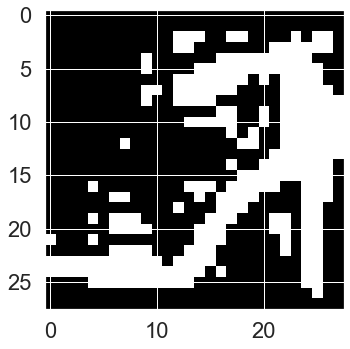

In [14]:
plt.imshow(np.reshape(x_train_ft_trans[1], (28,28)), cmap=plt.cm.gray, vmin=0.0, vmax=1.0)

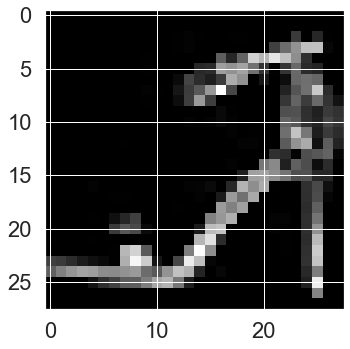

In [15]:
plt.imshow(np.reshape(x_train[1], (28,28)), cmap=plt.cm.gray, vmin=0.0, vmax=1.0)